# Módulo 30 - K-Means
**Atividade:**

Nesta tarefa, vamos explorar o algoritmo de clustering K-means aplicado a um contexto diferente do usual. Em vez de segmentar perfis de viajantes ou clientes de e-commerce, vamos usar dados biológicos para segmentar diferentes espécies de pinguins com base em características físicas. Esta abordagem destaca a versatilidade do K-means para diversas áreas além de vendas e marketing.

A base de dados utilizada é a penguins do pacote seaborn, que contém informações sobre três espécies de pinguins: Adelie, Chinstrap e Gentoo. As variáveis disponíveis incluem medições físicas dos pinguins coletadas na Antártica.

species: Espécie do pinguim (Adelie, Chinstrap, Gentoo)

island: Ilha onde o pinguim foi observado (Biscoe, Dream, Torgersen)

bill_length_mm: Comprimento do bico em milímetros

bill_depth_mm: Profundidade do bico em milímetros

flipper_length_mm: Comprimento da barbatana em milímetros

body_mass_g: Massa corporal em gramas

sex: Sexo do pinguim (Male, Female)

year: Ano em que a observação foi feita

In [25]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
penguins = sns.load_dataset('penguins')

In [ ]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


# 1 - Nesse exercício vocês devem verificar se temos variáveis missing, faltantes e excluir esses valores do dataset, também devem excluir as colunas com valores categóricos, que não utilizazam para o Kmeans.

In [3]:
# verificação de valores vaziu ou nulo
total_nulos = penguins.isnull().sum().sum()
total_vazios = (penguins == '').sum().sum()

print(f"Total de valores nulos: {total_nulos}")
print(f"Total de campos vazios: {total_vazios}")

Total de valores nulos: 19
Total de campos vazios: 0


In [18]:
penguins.isnull().sum()

,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2


In [5]:
penguins.drop(columns='species', inplace=True)
penguins.drop(columns='island', inplace=True)
penguins.drop(columns='sex', inplace=True)

In [19]:
# Remover colunas categóricas
df_numeric = penguins.select_dtypes(include=['float64', 'int64']).copy()

# Converter qualquer número que tenha vindo como texto
df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce')

# Trocar inf / -inf por NaN
df_numeric = df_numeric.replace([np.inf, -np.inf], np.nan)

# Remover definitivamente qualquer linha com NaN
df_penguin = df_numeric.dropna().copy()

# Conferir
print(df_penguin.isnull().sum())

bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
dtype: int64


# 2 - Visualize a análise descritiva dos seus dados utilizando a função vista em aula pairplot. É possível já identificar possíveis agrupamentos? Se sim, quantos?

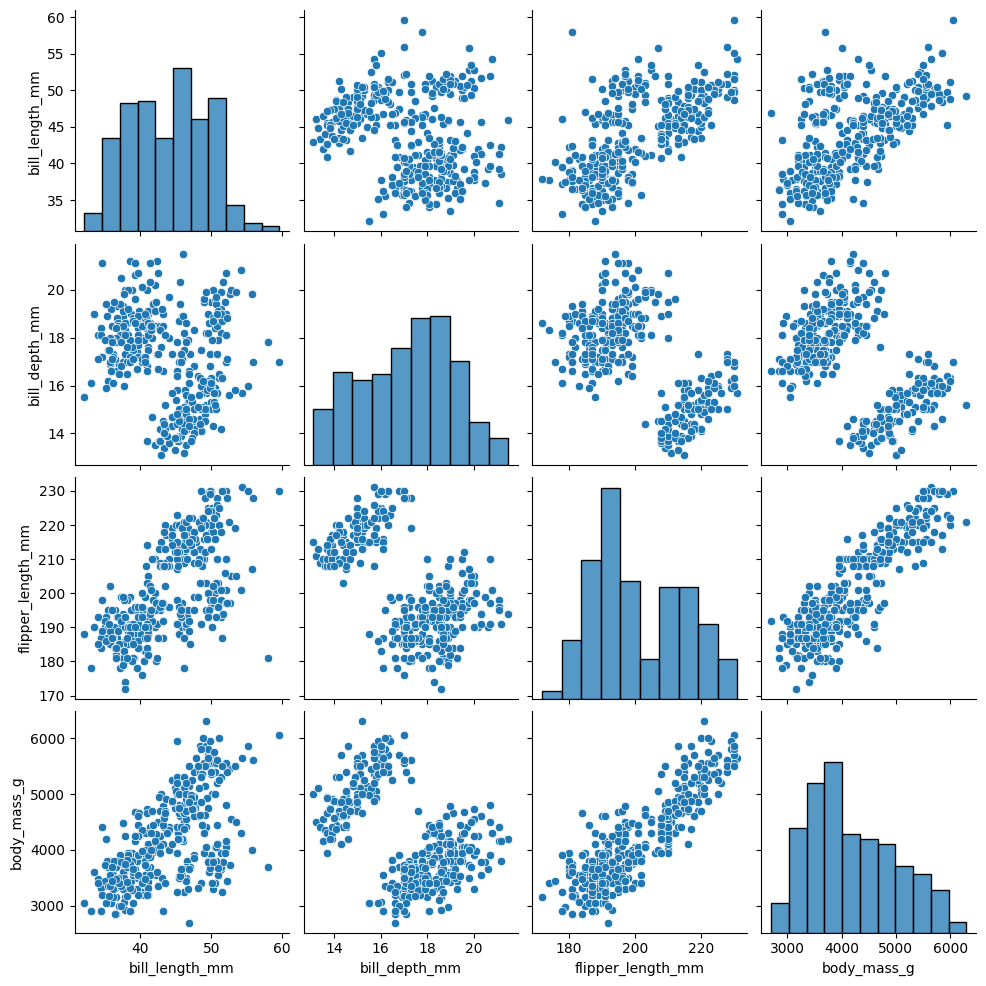

In [20]:
sns.pairplot(df_penguin)

Na analise do pairplot ja podemos ver alguns agrupamentos como prodfundidade dos bicos com a massa corporal e comprimento dos bicos e as profundidades.

# 3 - Realize a padronização dos dados e visualize os dados.

In [22]:
scaler = StandardScaler()

# Ajustar e transformar mantendo formato de DataFrame
df_scaled = pd.DataFrame(
    scaler.fit_transform(df_penguin),
    columns=df_penguin.columns,     # mantém os nomes das colunas
    index=df_penguin.index          # mantém os índices
)

df_scaled.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.884499,0.785449,-1.418347,-0.564142
1,-0.811126,0.126188,-1.062250,-0.501703
2,-0.664380,0.430462,-0.421277,-1.188532
4,-1.324737,1.089724,-0.563715,-0.938776
5,-0.847812,1.748985,-0.777373,-0.689020


# 4 - Aplique o algoritmo do k means escolhendo o numero de clusters como igual a 3, que é que a quantidade de espécies que temos na base.

In [23]:
# Definindo o modelo
kmeans = KMeans(n_clusters=3, random_state=42)

# Ajustando o modelo aos dados
kmeans.fit(df_scaled)

# Obtendo os clusters gerados
clusters = kmeans.labels_

# Adicionando a coluna de cluster ao dataframe original

df_scaled["cluster"] = clusters

# 5 - Construa pelo 2 matriz de dispersão como realizada em aula indicando os pontos e centroides.

**Comece usando x='bill_length_mm' e y='bill_depth_mm' para analisar o primeiro gráfico e em seguida escolha outras variaveis para o segundo.**

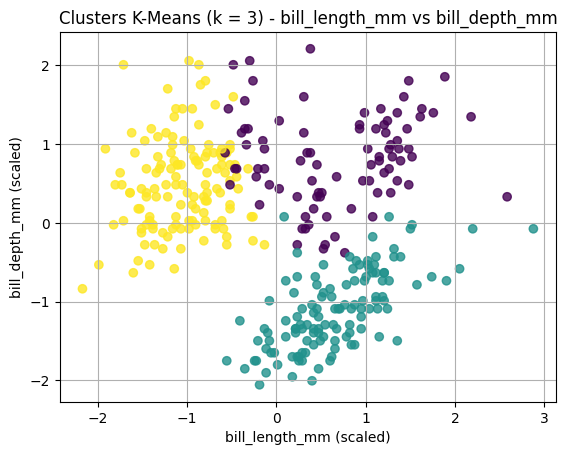

In [30]:
plt.scatter(
    df_scaled['bill_length_mm'],
    df_scaled['bill_depth_mm'],
    c=df_scaled['cluster'],   # cores pelos clusters
    cmap='viridis',
    alpha=0.8
)

plt.title("Clusters K-Means (k = 3) - bill_length_mm vs bill_depth_mm")
plt.xlabel("bill_length_mm (scaled)")
plt.ylabel("bill_depth_mm (scaled)")
plt.grid(True)
plt.show()

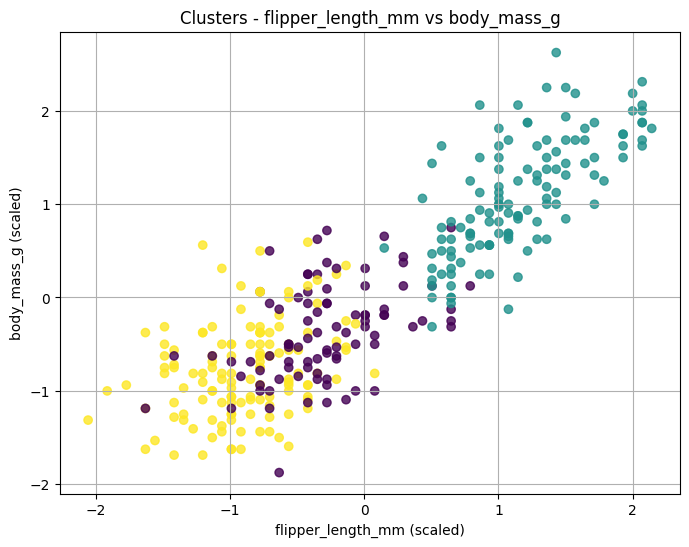

In [31]:
plt.figure(figsize=(8,6))
plt.scatter(
    df_scaled['flipper_length_mm'],
    df_scaled['body_mass_g'],
    c=df_scaled['cluster'],
    cmap='viridis',
    alpha=0.8
)

plt.title("Clusters - flipper_length_mm vs body_mass_g")
plt.xlabel("flipper_length_mm (scaled)")
plt.ylabel("body_mass_g (scaled)")
plt.grid(True)
plt.show()

# 6 - Pesquise mais 3 utilidades de aplicações de algoritmos de clusterização e cite abaixo:

1- Agrupamento de documentos, imagens e textos similares
2- detecção de padrões  e anomalias
3- Agrupamento de areas geograficas